In [4]:
# initial import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

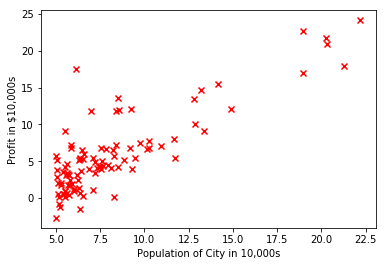

In [19]:
# 2.1 Plotting the Data

data = pd.read_csv('data/ex1data1.txt', header=None, usecols=[0,1])
X = data[0]
Y = data[1]

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(X, Y, marker='x', c='r') # color = red, marker = 'x'

In [6]:
def warmUpExercise():
    return np.identity(5);


warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [6]:
# 2.2 Gradient Descent
def computeCost(X, Y, theta= np.zeros((2, 1))):
    m = X.size  # 97
    x = np.transpose(np.array(
        [np.ones(X.size), np.array(X)]
    ))      # 97 x 2  의 (1, Xn)으로 이루어진 행렬
    
    y = np.array(Y)     # 1 x 97 (Yn)으로 이루어진 행렬
    y = y[:,None]
    # y = np.vstack(y)    # 97 x 1 (Yn)으로 이루어진 행렬
    h = x.dot(theta)    # hθ(x)=θTx=θ0 +θ1x1
    
    return 1 / (2 * m) * np.sum(np.square(h-y))
 

computeCost(X, Y)

32.072733877455676

[[-3.63029144]
 [ 1.16636235]]


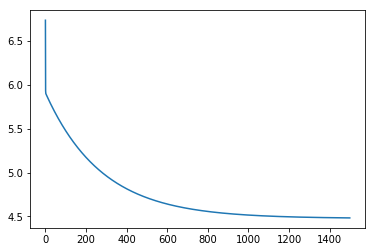

In [7]:
def gradientDescent(X, Y, theta=np.zeros((2, 1)), alpha=0.01, num_iter=1500):
    m = X.size
    J = np.zeros(num_iter)
    
    x = np.transpose(np.array(
        [np.ones(X.size), np.array(X)]
    ))      # 97 x 2  의 (1, Xn)으로 이루어진 행렬
    y = np.array(Y)     # 1 x 97 (Yn)으로 이루어진 행렬
    y = np.vstack(y)    # 97 x 1 (Yn)으로 이루어진 행렬
    
    for i in range(num_iter):
        h = x.dot(theta)
        theta = theta - (alpha * (1 / m)) * x.T.dot(h-y)
        J[i] = computeCost(X, Y, theta)
        
    return theta, J


theta, J = gradientDescent(X, Y)
print(theta)
plt.plot(J)

[4519.7678677]
[45342.45012945]


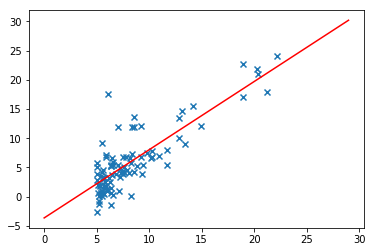

In [10]:
theta, J = gradientDescent(X, Y)

x = np.arange(0, 30)
y = theta[0] + theta[1] * x

plt.scatter(X, Y, marker='x')
plt.plot(x, y, c='r')

# Predict profit for a city with population of 35000 and 70000

print(np.array([1, 3.5]).dot(theta) * 10000)
print(np.array([1, 7]).dot(theta) * 10000)

-10.0 -9.591836734693878


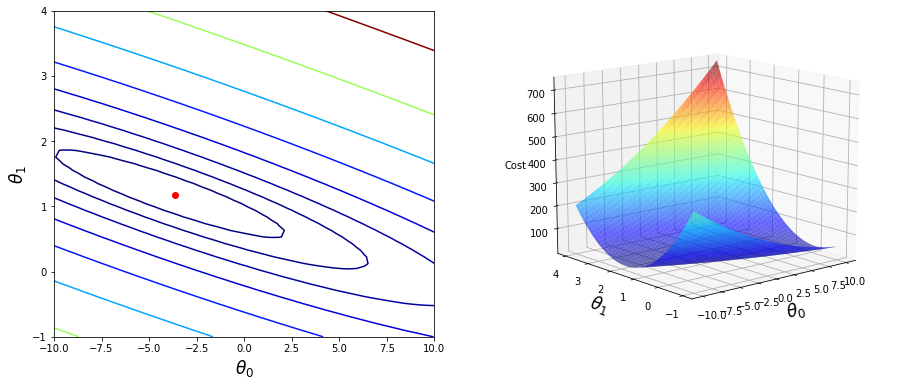

In [11]:
B0 = np.linspace(-10, 10, 50)   # -10 <= <10 50개 균등하게 뽑음
B1 = np.linspace(-1, 4, 50)

xx, yy = np.meshgrid(B0, B1, indexing='xy') 
Z = np.zeros((B0.size, B1.size))
 
# Calculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):     # v는 어디서 썼는가?
    Z[i, j] = computeCost(X, Y, theta=np.array([[xx[i,j]], [yy[i,j]]]))
    
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')


# # Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)
# 
# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)